In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import math
import pickle

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV

# 1. Business Understanding

## 1.1. Business Objective

### 1.1.1. Background

Situasi bisnis yang dihadapi oleh klien berfokus pada industri properti, dimana klien dari perusahaan X adalah pengembang real estate yang beroperasi di pasar penjualan rumah. Klien telah mengalami peningkatan biaya pembangunan dan tantangan dalam menentukan harga yang kompetitif untuk properti yang mereka jual. Salah satu masalah utamanya adalah adanya kesulitan dalam menentukan faktor-faktor utama yang memengaruhi harga rumah, serta bagaimana mengoptimalkan harga untuk menarik lebih banyak pembeli tanpa mengorbankan margin keuntungan.

Sebelumnya, klien telah mencoba berbagai solusi, seperti mengurangi biaya pembangunan dan meningkatkan promosi, namun hasilnya tidak signifikan dalam meningkatkan penjualan atau mempertahankan pelanggan. Oleh karena itu, klien mencari pendekatan yang lebih berbasis data untuk memahami apa yang sebenarnya mendorong harga rumah (variabel-variabel yang berpengaruh signifikan) dan bagaimana penyesuaian harga dapat dilakukan untuk meningkatkan daya saing di pasar.


### 1.1.2. Business Objectives

* Memberikan wawasan kepada agen real estate, pemilik, atau investor untuk menetapkan harga rumah secara strategis berdasarkan identifikasi pola-pola preferensi pembeli.
* Menganalisis faktor yang paling berpengaruh (berupa feature) terhadap harga rumah.
* Menawarkan prediksi harga yang akurat untuk calon pembeli.

### 1.1.3. Business Success Criteria

* Perusahaan mendapatkan faktor faktor apa saja yang mempegaruhi harga rumah.
* Penetapan harga rumah yang 90% akurat dalam mencerminkan nilai pasar sebenarnya berdasarkan faktor-faktor dalam data.
* Penurunan 10% margin kesalahan (margin of error) dalam menentukan harga properti.

## 1.2. Assess Situation

### 1.2.1. Inventory of Resources

A. Sumber Daya Teknologi

1. Infrastructure & Hardware:
- Server untuk pengolahan data: 2 unit dengan spesifikasi high-performance computing
- Workstation: 5 unit komputer dengan spesifikasi tinggi untuk analisis data
- Storage: 10TB cloud storage untuk penyimpanan dataset properti
- Laptop: 8 unit untuk tim data science dan IT

2. Software & Tools:
- Data Analysis: Python, PowerBI
- Machine Learning Framework: scikit-learn, TensorFlow
- Data Visualization: Tableau, PowerBI
- Database Management: PostgreSQL
- Version Control: Git, GitHub
- Cloud Services: AWS/Google Cloud Platform

B. Sumber Daya Data
1. Data Sources:
- Property Sales Data: Data historis penjualan properti
- Internal Database: Data transaksi historis perusahaan
- Public Dataset: Data demografi pemilik rumah dari sumber internet

C. Sumber Daya Manusia
1. Tim Proyek:
- Data Scientists: 3 orang (spesialisasi dalam predictive modeling)
- Data Engineers: 2 orang (pengolahan data)
- Business Analysts: 2 orang (domain expertise real estate)
- Project Manager: 1 orang (koordinasi dan manajemen proyek)

2. Subject Matter Experts:
- Real Estate Analysts: 2 orang (expertise pasar properti)
- Senior Sales Representatives: 2 orang (insight pasar dan kebutuhan pelanggan)

D. Sumber Daya Pendukung
1. Fasilitas:
- Dedicated Project Room: Ruang kerja khusus tim data science
- Meeting Room: Dilengkapi fasilitas video conference
- Training Room: Ruang untuk knowledge sharing dan training

2. Documentation:
- Project Documentation Tools: Notion

### 1.2.2. Requirement, Assumptions, and Constraints

Requirements:
* Pengumpulan data historis penjualan rumah, spesifikasi rumah, dan informasi pasar.
* Alat analisis yang diperlukan, seperti Python dan Scikit-learn.
* Keahlian dari tim data scientist untuk pembersihan, analisis, dan pengembangan model prediksi.
* Jadwal pelaksanaan yang jelas untuk setiap langkah proyek.

Assumptions:
* Data yang diperoleh berkualitas baik dan mencakup variabel yang relevan mempengaruhi harga rumah.
* Analisis dapat mengidentifikasi pola dan hubungan signifikan antara fitur dan harga rumah.
* Pasar properti akan tetap stabil selama periode proyek, sehingga hasil analisis dapat diterapkan secara efektif.

Constraints:
* Keterbatasan dana yang dapat membatasi penggunaan sumber daya tambahan, seperti perangkat keras yang mumpuni.
* Waktu yang menjadi batasan, dimana proyek harus diselesaikan dalam jangka waktu yang ditentukan.
* Jika data tidak lengkap atau tidak akurat, hasil dan validitas model yang dibangun dapat terpengaruh.

### 1.2.3. Risks and Contingencies

Risiko:
* Data yang didapat dari agen real estate fiturnya kurang, sehingga mengakibatkan akurasi data yang didapat kurang maksimal.
* Waktu yang tidak cukup untuk melakukan pengujian dan validasi model yang dapat menghasilkan model yang kurang akurat.
* Perubahan mendadak dalam pasar properti, seperti fluktuasi harga yang tidak terduga yang bisa mempengaruhi relevansi model prediksi.

Solusi:
* Menyusun timeline yang realistis dan fleksibel untuk setiap tahap proyek.
* Diperlukan feature engineering untuk mendapatkan kolom-kolom baru sehingga dapat menambah informasi dari bangunan dan dapat meningkatkan akurasi.
* Memantau tren pasar secara berkala dan melakukan penyesuaian pada model jika diperlukan untuk menjaga relevansi dan akurasi.

### 1.2.4. Terminology

* Regresi: Teknik statistik untuk memodelkan hubungan antara variabel dependen (target) dan satu atau lebih variabel independen (fitur). Tujuan regresi adalah memprediksi nilai dari variabel dependen berdasarkan nilai variabel independen.

* MSE (Mean Squared Error): Metrik untuk mengukur rata-rata kuadrat dari selisih antara nilai yang diprediksi dan nilai aktual dalam regresi. MSE memberikan gambaran seberapa besar kesalahan model secara keseluruhan. Nilai lebih kecil berarti prediksi lebih akurat.

* MAE (Mean Absolute Error): Metrik untuk mengukur rata-rata perbedaan absolut antara nilai yang diprediksi dan nilai aktual. Berbeda dengan MSE, MAE tidak mengkuadratkan kesalahan sehingga memberikan gambaran rata-rata kesalahan secara langsung.

* RMSE (Root Mean Squared Error): Akar kuadrat dari MSE. Metrik ini memberikan penilaian yang lebih sensitif terhadap kesalahan besar karena mengkuadratkan perbedaan antara nilai prediksi dan aktual sebelum mengambil rata-ratanya.

* R-squared (Coefficient of Determination): Ukuran statistik yang menunjukkan seberapa baik data yang diprediksi oleh model regresi cocok dengan data sebenarnya. Nilai R-squared berkisar dari 0 hingga 1, dimana semakin dekat dengan 1 semakin baik model memprediksi nilai target.

### 1.2.5. Costs and Benefits

| **No** | **Kegiatan**                          | **Alat**                | **Perkiraan Biaya Alat**   | **Biaya Pekerja**     | **Total Biaya**         | **Manfaat Terkait**                                         |
|--------|---------------------------------------|-------------------------|-----------------------------|------------------------|--------------------------|-------------------------------------------------------------|
| 1      | **Pengumpulan Data**                 | Database            | Rp 2.000.000                     | Rp 2.000.000           | Rp 5.200.000             | - Mempermudah perencanaan proyek.<br>- Memvisualisasikan timeline secara efektif. |
|        |                                       | Microsoft Excel         | Rp 1.200.000 (lisensi)     |                        |                          | - Familiaritas pengguna mempercepat proses analisis.       |
| 2      | **Pembersihan dan Pra-pemrosesan Data** | Google Colab Pro                | Rp. 200.000                      | Rp 1.500.000           | Rp 1.700.000             | - Meningkatkan efisiensi pembersihan data dan meminimalkan kesalahan manual. |
|        |                                       | Microsoft Excel         |                             |                        |                          | - Alat analisis yang kuat dengan banyak fungsi built-in.   |
| 3      | **Eksplorasi Data**                  | Microsoft Excel         |                             | Rp 2.000.000           | Rp 2.000.000             | - Memudahkan visualisasi dan analisis data awal.           |
|        |                                       | Google Colab Pro                 |                             |                        |                          | - Fleksibilitas tinggi untuk analisis data kompleks.        |
| 4      | **Analisis Deskriptif**              | Microsoft Excel         |                             | Rp 1.500.000           | Rp 1.500.000             | - Visualisasi yang jelas dan mendalam tentang variabel yang berpengaruh. |
|        |                                       | Google Colab Pro                  |                             |                        |                          | - Mendapatkan wawasan yang lebih dalam mengenai data.       |
| 5      | **Pengembangan Model Prediksi**      | Google Colab Pro                  |                             | Rp 2.500.000           | Rp 2.500.000             | - Model yang akurat dan dapat diandalkan untuk memprediksi harga berdasarkan fitur. |
|        |                                       | Linear Regression       |                      |                        |                          | - Mudah dipahami dan cepat dalam pelatihan.                 |
|        |                                       | Random Forest           |                       |                        |                          | - Mampu menangani data yang hilang dan fitur yang beragam.  |
|        |                                       | Gradient Boosting       |                      |                        |                          | - Kinerja tinggi dalam kompetisi pemodelan.                |
| 6      | **Validasi Model**                   | Google Colab Pro                  |                             | Rp 1.500.000           | Rp 1.500.000             | - Meningkatkan kepercayaan terhadap model yang dibangun.    |
| 7      | **Pengembangan Laporan dan Presentasi** | Microsoft Word        | Rp 1.200.000 (lisensi)     | Rp 1.500.000           | Rp 2.700.000             | - Mempermudah penyampaian hasil analisis kepada pemangku kepentingan. |
| 8      | **Monitoring dan Evaluasi**         |  Google Colab Pro          |                      | Rp 1.500.000           | Rp 1.500.000             | - Memudahkan evaluasi kinerja proyek dan hasil yang dicapai. |

---

### **Total Biaya Seluruh Kegiatan: Rp 18.600.000**

## 1.3. Determine Data Science Goals

### 1.3.1. Data Science Goals

* Menambahkan fitur lain (melalui feature engineering) untuk lebih memahami dampak lokasi, ukuran, kondisi, dan lain-lain terhadap harga rumah dalam meningkatkan wawasan terhadap preferensi pembeli.
* Melakukan analisis korelasi untuk mengidentifikasi fitur yang paling berdampak pada harga rumah.
* Membangun model prediktif berbasis Gradient Boosting Regressor untuk memproyeksikan harga rumah secara akurat.

### 1.3.2. Data Science Success Criteria

*   R² (Koefisien Determinasi) > 0.9
*   Tingkat Kesalahan Prediksi < 5%
*   Waktu Pemrosesan Model < 5 detik

## 1.4. Produce Project Plan

### 1.4.1. Project Plan

In [ ]:
data = {
    "No": [1, 2, 3, 4, 5, 6, 7, 8],
    "Langkah Proyek": [
        "Pengumpulan Data",
        "Pembersihan dan Pra-pemrosesan Data",
        "Eksplorasi Data",
        "Analisis Deskriptif",
        "Pengembangan Model Prediksi",
        "Validasi Model",
        "Pengembangan Laporan dan Presentasi",
        "Monitoring dan Evaluasi"
    ],
    "Deskripsi": [
        "Mengumpulkan data historis penjualan rumah, data pelanggan, dan data pasar.",
        "Membersihkan data dari kesalahan dan mempersiapkan untuk analisis.",
        "Melakukan analisis eksplorasi untuk memahami data dan menemukan pola.",
        "Menganalisis faktor-faktor yang mempengaruhi harga rumah.",
        "Membangun model regresi untuk memprediksi harga rumah.",
        "Menguji dan memvalidasi model untuk memastikan akurasi.",
        "Menyusun laporan hasil analisis dan presentasi untuk pemangku kepentingan.",
        "Memantau hasil dari implementasi dan melakukan evaluasi berkala."
    ],
    "Waktu (Minggu)": [2, 1, 2, 1, 3, 1, 2, "Berkelanjutan"],
    "Sumber Daya yang Dibutuhkan": [
        "Tim Data Scientist, akses ke database, alat ETL.",
        "Tim Data Scientist, perangkat lunak pembersihan data.",
        "Tim Data Scientist, perangkat lunak analisis data (Python/R).",
        "Tim Data Scientist, alat visualisasi (Tableau/Power BI).",
        "Tim Data Scientist, perangkat lunak pemodelan (Python/R).",
        "Tim Data Scientist, data validasi, perangkat lunak analisis.",
        "Tim Data Scientist, alat presentasi (PowerPoint/Google Slides).",
        "Tim Data Scientist dan Tim Pemasaran."
    ]
}

df_proyek = pd.DataFrame(data)
df_proyek

,No,Langkah Proyek,Deskripsi,Waktu (Minggu),Sumber Daya yang Dibutuhkan
0,1,Pengumpulan Data,"Mengumpulkan data historis penjualan rumah, da...",2,"Tim Data Scientist, akses ke database, alat ETL."
1,2,Pembersihan dan Pra-pemrosesan Data,Membersihkan data dari kesalahan dan mempersia...,1,"Tim Data Scientist, perangkat lunak pembersiha..."
2,3,Eksplorasi Data,Melakukan analisis eksplorasi untuk memahami d...,2,"Tim Data Scientist, perangkat lunak analisis d..."
3,4,Analisis Deskriptif,Menganalisis faktor-faktor yang mempengaruhi h...,1,"Tim Data Scientist, alat visualisasi (Tableau/..."
4,5,Pengembangan Model Prediksi,Membangun model regresi untuk memprediksi harg...,3,"Tim Data Scientist, perangkat lunak pemodelan ..."
5,6,Validasi Model,Menguji dan memvalidasi model untuk memastikan...,1,"Tim Data Scientist, data validasi, perangkat l..."
6,7,Pengembangan Laporan dan Presentasi,Menyusun laporan hasil analisis dan presentasi...,2,"Tim Data Scientist, alat presentasi (PowerPoin..."
7,8,Monitoring dan Evaluasi,Memantau hasil dari implementasi dan melakukan...,Berkelanjutan,Tim Data Scientist dan Tim Pemasaran.


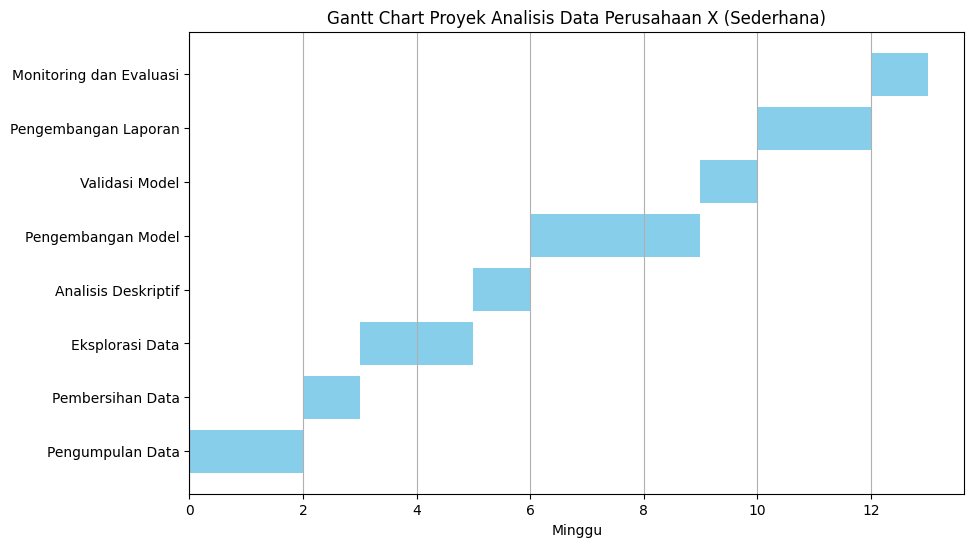

In [ ]:
data = {
    'Langkah Proyek': [
        'Pengumpulan Data',
        'Pembersihan Data',
        'Eksplorasi Data',
        'Analisis Deskriptif',
        'Pengembangan Model',
        'Validasi Model',
        'Pengembangan Laporan',
        'Monitoring dan Evaluasi'
    ],
    'Mulai': [0, 2, 3, 5, 6, 9, 10, 12],
    'Durasi': [2, 1, 2, 1, 3, 1, 2, 1]
}

data['Akhir'] = [start + duration for start, duration in zip(data['Mulai'], data['Durasi'])]

fig, ax = plt.subplots(figsize=(10, 6))

for i, (start, duration) in enumerate(zip(data['Mulai'], data['Durasi'])):
    ax.barh(data['Langkah Proyek'][i], duration, left=start, color='skyblue')

ax.set_xlabel('Minggu')
ax.set_title('Gantt Chart Proyek Analisis Data Perusahaan X (Sederhana)')
ax.set_yticks(np.arange(len(data['Langkah Proyek'])))
ax.set_yticklabels(data['Langkah Proyek'])
ax.grid(axis='x')

plt.show()

### 1.4.2. Initial Assessment of Tools and Techniques

1. Manajemen Proyek
    > GanttProject
        Kelebihan: Gratis dan sumber terbuka; antarmuka sederhana; mudah digunakan untuk membuat diagram Gantt.
        Kekurangan: Fitur terbatas dibandingkan dengan alat berbayar; kurang cocok untuk proyek besar.

2. Eksplorasi Data
    > Microsoft Excel
        Kelebihan: Familiaritas pengguna; alat analisis dan visualisasi yang kuat; banyak fungsi built-in.
        Kekurangan: Terbatas dalam menangani dataset besar; tidak optimal untuk visualisasi yang kompleks.

3. Model
    > Python
        Kelebihan: Fleksibel dan banyak pustaka (seperti Pandas, NumPy, scikit-learn); komunitas yang besar dan dukungan luas.
        Kekurangan: Memerlukan pemahaman pemrograman; kecepatan bisa menjadi masalah dengan dataset besar.

4. Laporan
    > Microsoft Word
        Kelebihan: Familiar dan mudah digunakan; fitur pengeditan teks yang kuat.
        Kekurangan: Kurang fleksibel untuk dokumen teknis yang kompleks; manajemen referensi yang lebih sulit.

5. Teknik Prediksi
    > Linear Regression
        Kelebihan: Sederhana dan mudah dipahami; interpretasi koefisien yang jelas; cepat dalam pelatihan.
        Kekurangan: Sensitif terhadap outlier; asumsi linieritas yang mungkin tidak terpenuhi di semua dataset.

    > Random Forest
        Kelebihan: Tahan terhadap overfitting; mampu menangani data yang hilang dan fitur yang beragam; tidak memerlukan pra-pemrosesan yang ekstensif.
        Kekurangan: Kurang transparan dalam interpretasi hasil; waktu pelatihan yang lebih lama dibandingkan dengan model yang lebih sederhana.

    > Gradient Boosting
        Kelebihan: Kinerja tinggi dalam kompetisi pemodelan; dapat menangani fitur non-linear dan interaksi; fleksibel dalam menangani berbagai jenis data.
        Kekurangan: Memerlukan pemahaman parameter tuning; dapat rentan terhadap overfitting jika tidak diatur dengan baik; waktu pelatihan yang lebih lama dibandingkan model sederhana.

# 2. Data Understanding

## 2.1. Collect Initial Data

### 2.1.1. Initial Data Collection Report

Data spesifikasi rumah didapatkan dari sebuah perusahaan X yang bergerak di bidang real estate yang ingin menganalisis harga rumah yang mereka berikan apakah sudah sesuai dengan spesifikasi yang ditawarkan, oleh karena itu kami dipercaya dan diberikan data untuk memberikan saran harga untuk rumah tersebut berdasarkan spesifikasi yang ditawarkan.

In [ ]:
train_data = pd.read_csv('https://raw.githubusercontent.com/da3gal/ml-casebook/main/machine%20learning/regression/house%20price%20dataset/train_data.csv')

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/da3gal/ml-casebook/main/machine%20learning/regression/house%20price%20dataset/public_test_data.csv')

## 2.2. Describe Data

### 2.2.1. Data Description Report

Berikut adalah penjelasan umum mengenai dataset yang digunakan:

* Dataset terdiri dari 3680 baris dan 16 kolom berformat `.csv`.
* 4 kolom bertipe int64 (bedrooms, sqft_living, sqft_lot, waterfront, view, condition, sqft_above, sqft_basement, yr_built, yr_renovated), 3 kolom bertipe float64 (bathrooms, floors, price), dan 3 lain kolom bertipe object (street, city, statezip).
* Setiap kolom merepresentasikan informasi berikut:
1. bedrooms: Jumlah kamar tidur dalam rumah (dtype: int64).
2. bathrooms: Jumlah kamar mandi dalam rumah (dtype: float64).
3. sqft_living: Ukuran area dalam rumah dalam satuan kaki persegi (dtype: int64).
4. sqft_lot: Ukuran lahan dalam satuan kaki persegi (dtype: int64).
5. floors: Jumlah lantai pada rumah (dtype: float64).
6. waterfront: Indikator apakah rumah berada di tepi perairan (0 = Tidak, 1 = Ya) (dtype: int64).
7. view: Skor pemandangan rumah dengan skala tertentu (dtype: int64).
8. condition: Kondisi fisik rumah dengan skala tertentu (dtype: int64).
9. sqft_above: Luas area di atas tanah dalam rumah (tidak termasuk basement) dalam satuan kaki persegi (dtype: int64).
10. sqft_basement: Luas basement dalam satuan kaki persegi (dtype: int64).
11. yr_built: Tahun pembangunan rumah (dtype: int64).
12. yr_renovated: Tahun terakhir renovasi dilakukan pada rumah (dtype: int64).
13. street: Nama jalan tempat rumah berada (dtype: object).
14. city: Nama kota tempat rumah berada (dtype: object).
15. statezip: Kode negara bagian dan kode pos (dtype: object).
16. price: Harga rumah dalam satuan float64.

Adapun berdasarkan hasil statistik deskriptif pada dataset, berikut adalah beberapa insight utama yang dapat diperoleh:

* bedrooms: Jumlah kamar tidur berkisar dari 0 hingga 9, dengan rata-rata hampir 3 kamar tidur.
* bathrooms: Jumlah kamar mandi berkisar dari 0 hingga 6.75, dengan rata-rata sekitar 2 kamar mandi.
* sqft_living: Ukuran area hidup berkisar antara 370 hingga 10,040 kaki persegi, dengan rata-rata 2,141 kaki persegi.
* sqft_lot: Ukuran lahan berkisar dari 704 hingga 1,074,218 kaki persegi, dengan rata-rata sekitar 14,475 kaki persegi.
* floors: Jumlah lantai berkisar dari 1 hingga 3.5, dengan rata-rata sekitar 1.5 lantai.
* waterfront: Hanya sedikit rumah yang berada di tepi perairan, rata-rata nilai untuk kolom ini adalah 0.006.
* view: Nilai pemandangan berkisar antara 0 hingga 4, dengan rata-rata sekitar 0.24.
* condition: Kondisi rumah berkisar dari 1 hingga 5, dengan rata-rata kondisi berada di level 3.5.
* sqft_above: Luas area di atas tanah berkisar dari 370 hingga 8,020 kaki persegi, dengan rata-rata sekitar 1,825 kaki persegi.
* sqft_basement: Luas basement berkisar dari 0 hingga 4,820 kaki persegi, dengan rata-rata sekitar 315 kaki persegi.
* yr_built: Tahun pembangunan rumah berkisar dari 1900 hingga 2014, dengan rata-rata tahun pembangunan sekitar 1970.
* yr_renovated: Tahun renovasi terakhir berkisar dari 0 hingga 2014, dengan banyak rumah yang belum pernah direnovasi (nilai 0).
* price: Harga rumah bervariasi dari USD 0 hingga USD 7,062,500, dengan harga rata-rata sekitar USD 544,134.

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       2944 non-null   int64  
 1   bathrooms      2944 non-null   float64
 2   sqft_living    2944 non-null   int64  
 3   sqft_lot       2944 non-null   int64  
 4   floors         2944 non-null   float64
 5   waterfront     2944 non-null   int64  
 6   view           2944 non-null   int64  
 7   condition      2944 non-null   int64  
 8   sqft_above     2944 non-null   int64  
 9   sqft_basement  2944 non-null   int64  
 10  yr_built       2944 non-null   int64  
 11  yr_renovated   2944 non-null   int64  
 12  street         2944 non-null   object 
 13  city           2944 non-null   object 
 14  statezip       2944 non-null   object 
 15  price          2944 non-null   float64
dtypes: float64(3), int64(10), object(3)
memory usage: 368.1+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       736 non-null    int64  
 1   bathrooms      736 non-null    float64
 2   sqft_living    736 non-null    int64  
 3   sqft_lot       736 non-null    int64  
 4   floors         736 non-null    float64
 5   waterfront     736 non-null    int64  
 6   view           736 non-null    int64  
 7   condition      736 non-null    int64  
 8   sqft_above     736 non-null    int64  
 9   sqft_basement  736 non-null    int64  
 10  yr_built       736 non-null    int64  
 11  yr_renovated   736 non-null    int64  
 12  street         736 non-null    object 
 13  city           736 non-null    object 
 14  statezip       736 non-null    object 
 15  price          736 non-null    float64
dtypes: float64(3), int64(10), object(3)
memory usage: 92.1+ KB


In [ ]:
train_data.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
count,2944.000000,2944.000000,2944.000000,2.944000e+03,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2.944000e+03
mean,3.398438,2.153787,2141.204144,1.447538e+04,1.510530,0.006454,0.238111,3.454144,1825.582201,315.621943,1970.023098,810.995584,5.474138e+05
std,0.905984,0.785813,962.695894,3.635410e+04,0.536843,0.080090,0.769819,0.678240,864.020897,465.944646,29.940548,980.009508,3.848788e+05
min,0.000000,0.000000,370.000000,7.040000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000e+00
25%,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1950.000000,0.000000,3.250000e+05
50%,3.000000,2.250000,1980.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,1580.000000,0.000000,1974.000000,0.000000,4.650000e+05
75%,4.000000,2.500000,2620.000000,1.103650e+04,2.000000,0.000000,0.000000,4.000000,2300.750000,610.000000,1997.000000,1999.000000,6.586910e+05
max,9.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000,7.062500e+06


In [ ]:
test_data.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,7.360000e+02
mean,3.407609,2.167799,2124.429348,16173.156250,1.501359,0.012228,0.228261,3.459239,1826.576087,297.853261,1972.698370,833.811141,5.185009e+05
std,0.900278,0.765788,911.017256,35172.073581,0.534521,0.109978,0.771651,0.682908,830.130967,453.366633,28.582118,983.703574,3.094754e+05
min,1.000000,0.750000,550.000000,638.000000,1.000000,0.000000,0.000000,1.000000,550.000000,0.000000,1900.000000,0.000000,0.000000e+00
25%,3.000000,1.750000,1480.000000,5272.500000,1.000000,0.000000,0.000000,3.000000,1200.000000,0.000000,1954.000000,0.000000,3.150000e+05
50%,3.000000,2.250000,1975.000000,7800.000000,1.500000,0.000000,0.000000,3.000000,1605.000000,0.000000,1977.000000,0.000000,4.500000e+05
75%,4.000000,2.500000,2600.000000,11465.500000,2.000000,0.000000,0.000000,4.000000,2292.500000,600.000000,1997.000000,1999.000000,6.186875e+05
max,7.000000,5.750000,7320.000000,435600.000000,3.000000,1.000000,4.000000,5.000000,7320.000000,2850.000000,2014.000000,2014.000000,2.200000e+06


## 2.3. Explore Data

In [ ]:
pd.set_option('display.max_rows', None)

correlation_matrix = train_data.drop(columns=['street', 'city', 'statezip']).corr()
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)
print("\nCorrelation with price:\n", correlation_with_price)


Correlation with price:
 price            1.000000
sqft_living      0.678391
sqft_above       0.578724
bathrooms        0.496480
view             0.338288
sqft_basement    0.328482
bedrooms         0.311311
floors           0.251900
waterfront       0.216520
sqft_lot         0.074446
condition        0.040066
yr_built         0.029667
yr_renovated    -0.031524
Name: price, dtype: float64


#### 2.3.1.1 Price Tier

<ipython-input-5-b0f424d191d7>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='Price Tier', palette='viridis')


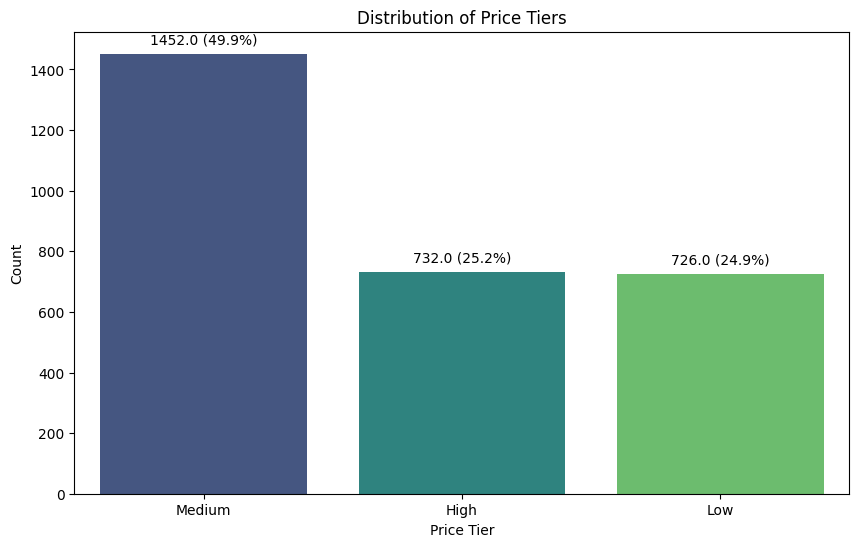

In [ ]:
stats = train_data['price'].describe()

low_boundary = stats['25%']  # kuartil pertama
high_boundary = stats['75%']  # kuartil ketiga

def price_tier(price):
    if pd.isna(price):
        return 'Unknown'
    elif price < low_boundary:
        return 'Low'
    elif low_boundary <= price < high_boundary:
        return 'Medium'
    else:
        return 'High'

train_data['Price Tier'] = train_data['price'].apply(price_tier)

price_tier_counts = train_data['Price Tier'].value_counts()
price_tier_percentages = (price_tier_counts / price_tier_counts.sum()) * 100

summary_df = pd.DataFrame({
    'Count': price_tier_counts,
    'Percentage': price_tier_percentages
}).reset_index()

summary_df.columns = ['Price Tier', 'Count', 'Percentage']

plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Price Tier', palette='viridis')
plt.title('Distribution of Price Tiers')
plt.xlabel('Price Tier')
plt.ylabel('Count')

for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()} ({p.get_height()/len(train_data)*100:.1f}%)',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom',
                 fontsize=10, color='black',
                 rotation=0,
                 xytext=(0, 5),
                 textcoords='offset points')

plt.show()

#### 2.3.1.2 House Age Group

<ipython-input-6-ae958d82908d>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=train_data, x='House Age Group', palette='coolwarm')


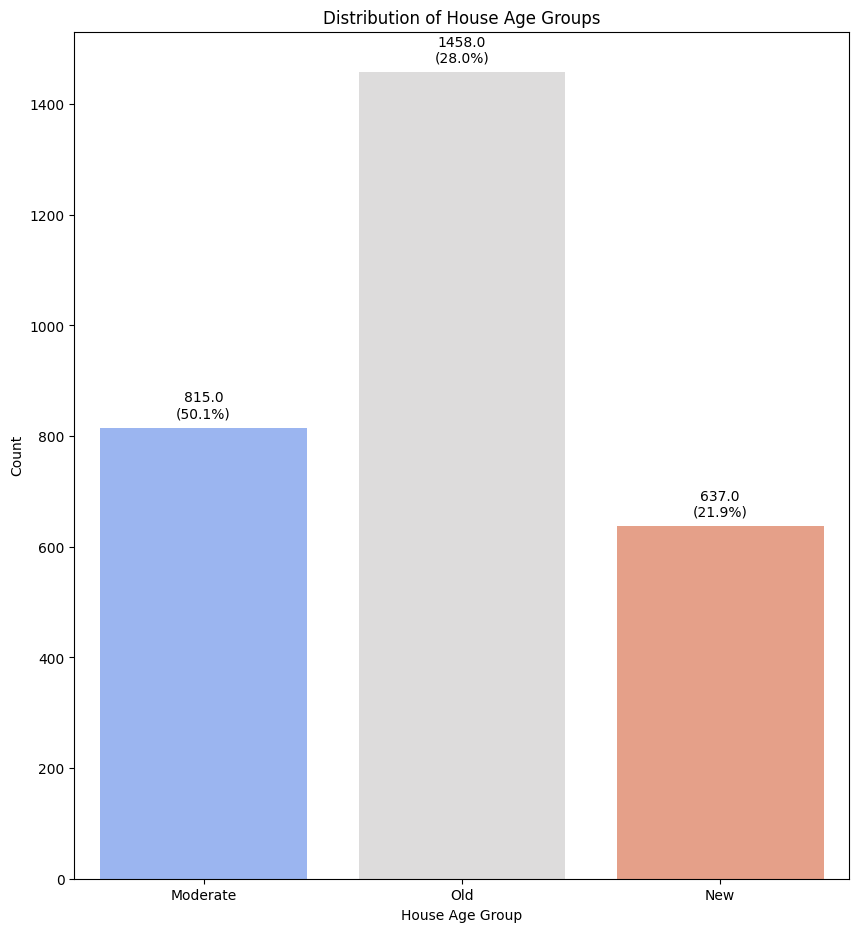

In [ ]:
train_data['House Age'] = 2024 - train_data['yr_built']

def age_group(age):
    if age < 25:
        return 'New'
    elif 25 <= age < 50:
        return 'Moderate'
    else:
        return 'Old'

train_data['House Age Group'] = train_data['House Age'].apply(age_group)

age_group_counts = train_data['House Age Group'].value_counts()
age_group_percentage = (age_group_counts / age_group_counts.sum()) * 100

age_group_summary = pd.DataFrame({
    'Count': age_group_counts,
    'Percentage': age_group_percentage
}).reset_index()

age_group_summary.columns = ['House Age Group', 'Count', 'Percentage']

plt.figure(figsize=(10, 11))
ax = sns.countplot(data=train_data, x='House Age Group', palette='coolwarm')

for p in ax.patches:
    height = p.get_height()
    group_label = p.get_x() + p.get_width() / 2
    percentage = age_group_percentage[age_group_counts.index[int(group_label)]]
    ax.annotate(f'{height}\n({percentage:.1f}%)',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, color='black',
                xytext=(0, 5),  # Offset text
                textcoords='offset points')

plt.title('Distribution of House Age Groups')
plt.xlabel('House Age Group')
plt.ylabel('Count')
plt.show()

#### 2.3.1.3 City Distribution

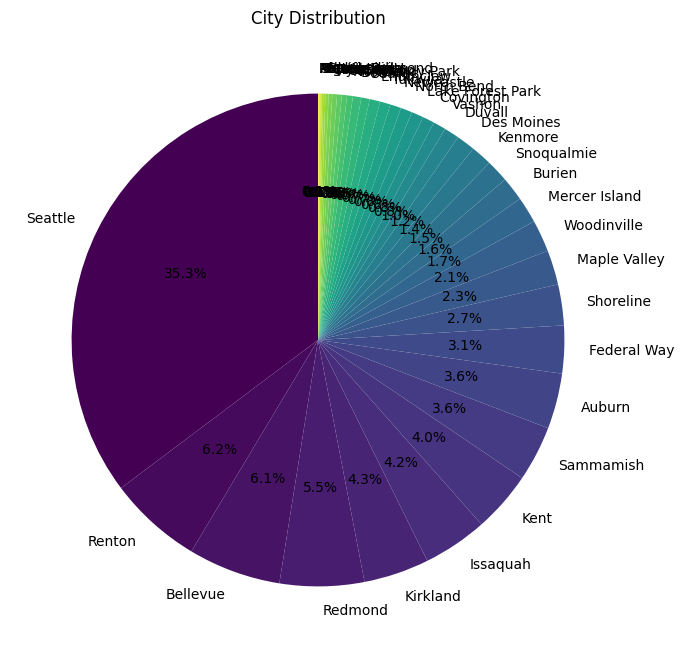

In [ ]:
plt.figure(figsize=(16, 8))
train_data['city'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('City Distribution')
plt.ylabel('')
plt.show()

#### 2.3.1.4 Year Built Distribution

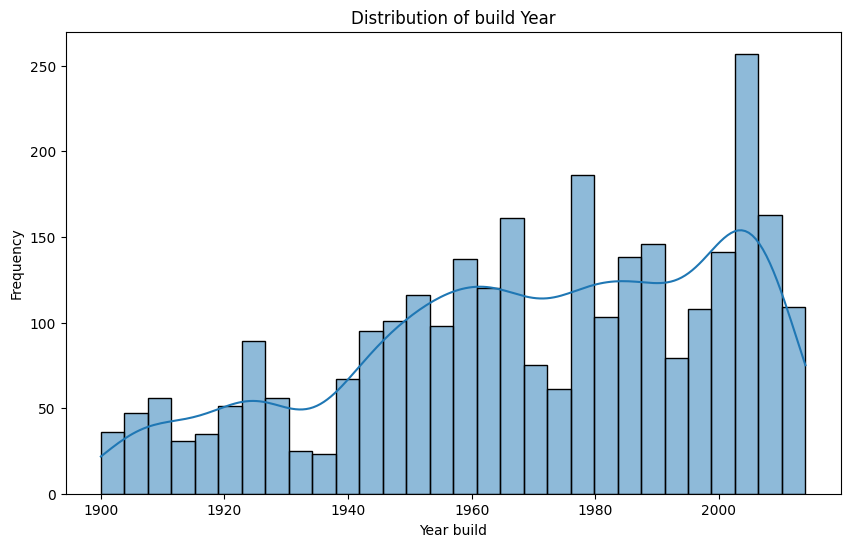

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='yr_built', bins=30, kde=True)
plt.title('Distribution of build Year')
plt.xlabel('Year build')
plt.ylabel('Frequency')
plt.show()

#### 2.3.1.5 'Bellevue' City Anomaly in 'City' and 'Price' Column

In [ ]:
bellevue_data = train_data[train_data['city'].str.lower() == 'bellevue'].sort_values(by='price')
bellevue_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,price,Price Tier,House Age,House Age Group
1758,3,1.00,950,9400,1.0,0,0,4,950,0,1954,1979,Bellevue,WA 98006,248000.0,Low,70,Old
88,3,1.50,1770,17208,1.0,0,0,3,1160,610,1959,1989,Bellevue,WA 98006,254000.0,Low,65,Old
1541,3,1.00,1150,7314,1.0,0,0,3,1150,0,1960,2012,Bellevue,WA 98008,300000.0,Low,64,Old
317,3,1.50,1170,4950,1.0,0,0,4,1170,0,1960,2001,Bellevue,WA 98007,330000.0,Medium,64,Old
1812,3,1.50,1240,11200,1.0,0,0,4,1240,0,1954,1979,Bellevue,WA 98006,345000.0,Medium,70,Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,4,3.50,4370,8510,2.0,0,1,3,3610,760,2003,0,Bellevue,WA 98004,1965221.0,High,21,New
310,3,2.25,3230,17833,2.0,0,0,4,3230,0,1973,0,Bellevue,WA 98006,2110000.0,High,51,Old
2417,4,3.25,4250,8570,2.0,0,0,3,4250,0,2004,2003,Bellevue,WA 98004,2300000.0,High,20,New
1616,4,3.00,6430,27517,2.0,0,0,3,6430,0,2001,0,Bellevue,WA 98004,4489000.0,High,23,New


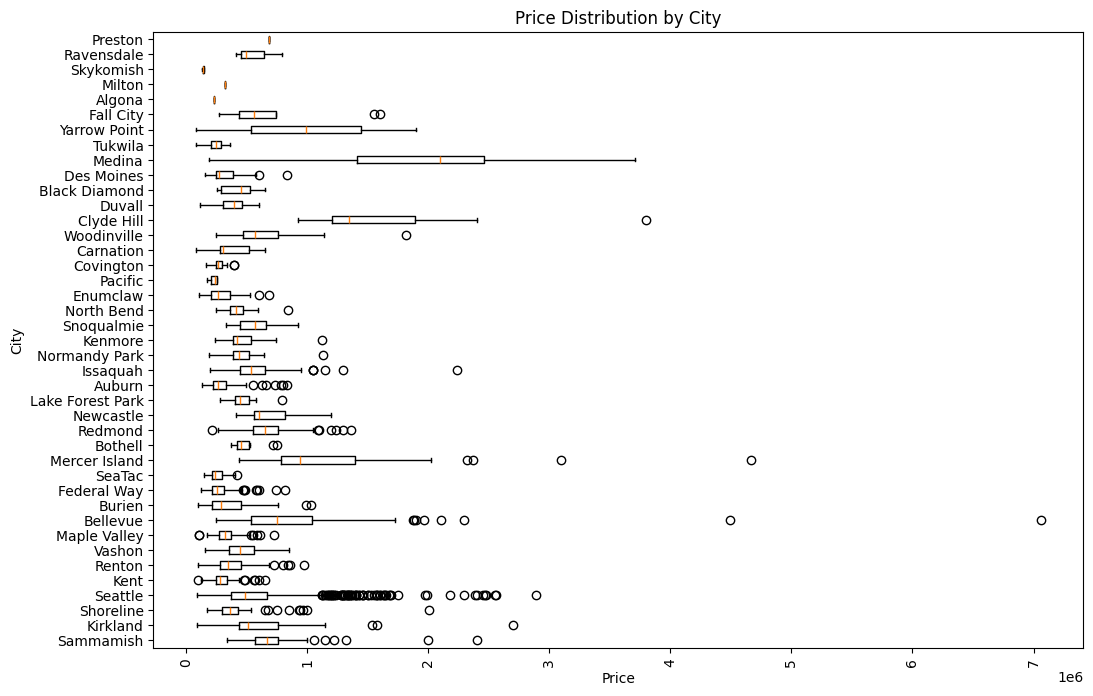

In [ ]:
plt.figure(figsize=(12, 8))
plt.boxplot([train_data['price'][train_data['city'] == city] for city in train_data['city'].unique()], labels=train_data['city'].unique(), vert=False)
plt.xlabel('Price')
plt.ylabel('City')
plt.title('Price Distribution by City')
_ = plt.xticks(rotation=90)

#### 2.3.1.6 House Area in Mountain Based on 'Sqft_Lot'

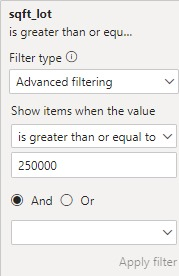

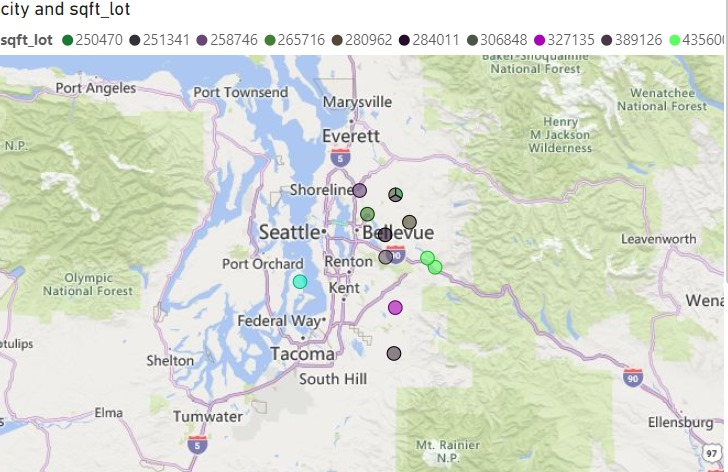

#### 2.3.1.7 Houses by Condition and Year Built (Two Anomalies with Poor House Condition and High Price)

In [ ]:
price_condition_built = train_data.groupby(['condition', 'yr_built'])['price'].mean().reset_index()

price_condition_built = price_condition_built.merge(
    train_data[['condition', 'yr_built', 'city']],
    on=['condition', 'yr_built'],
    how='left'
).drop_duplicates()

fig = px.line(price_condition_built,
              x='yr_built',
              y='price',
              color='condition',
              title="Rata-Rata Harga Berdasarkan Kondisi dan Tahun Dibangun",
              labels={'yr_built': 'Tahun Dibangun', 'price': 'Rata-Rata Harga'},
              markers=True,
              hover_data=['city'])

fig.show()

### 2.3.1. Data Exploration Report

Dalam Data Exploration Report berdasarkan hasil visualisasi dan analisis, temuan-temuan tersebut adalah sebagai berikut:

1. Sebagian besar rumah adalah rumah dengan kategori harga menengah (49,9%), disusul kategori tinggi (25,2%), dan terendah adalah kategori harga rendah 24,9%.

2. Sebanyak 50,1% rumah dikategorikan sebagai 'sedang', 28% dikategorikan sebagai rumah 'tua', dan 21,9% dikategorikan sebagai rumah 'baru'. Kategori 'tua' memiliki jumlah rumah terbanyak, disusul oleh kategori 'sedang' dan 'baru'.

3. Kota Seattle memiliki persentase sebaran rumah tertinggi, yaitu 35,3%, diikuti oleh Renton dengan 6,2%, dan Bellevue dengan 6,1%.

4. Distribusi tahun pembangunan rumah:
- Pada tahun 1910-1919 penurunan rumah dibangun karena perang dunia 1
- Pada tahun 1930-1939 penurunan rumah dibangun karena perang dunia 2
- Pada tahun 1972 sampai 1976 penuruna rumah dibangun karena inflasi ekonomi di US (market crash led to stagnant housing market )
- Pada tahun 1992 penurunan rumah dibangun akibat resesi ekonomi di US dan housing market correction

5. Bangunan di kota Bellevue memiliki harga tinggi karena luas lahan dan bangunan besar, dua lantai, pemandangan waterfront Yarrow Bay, serta adanya basement dan renovasi baru.

6. Rumah dengan luas lahan lebih dari 250.000 banyak dibangun di daerah pegunungan. (INSIGHT NYA APA)

7. Dua anomali pada visualisasi menunjukkan rumah dengan kondisi kurang bagus namun berharga mahal karena berada di kawasan Wolf Bay yang memiliki waterfront indah dan dekat dengan University of Washington.


## 2.4. Verify Data Quality

### 2.4.1. Data Quality Report

Dataset ini didominasi dari tipe data numerik baik integer maupun float. Untuk menjaga konsistensi saat membangun model machine learning, diperlukan proses scaling seperti menggunakan Min-Max Scaling agar skala antar variabel menjadi seimbang.

Dari hasil pengamatan, tidak terdapat missing values atau data yang hilang dalam dataset ini, sehingga tidak ada langkah tambahan yang diperlukan untuk penanganan missing data. Selain itu, dataset juga bersih dari duplikasi, sehingga tidak memerlukan penghapusan data ganda, sehingga semua data dapat digunakan tanpa perlu penyesuaian lebih lanjut. Secara keseluruhan, kualitas data dalam dataset ini cukup baik dan siap digunakan untuk analisis lebih lanjut. Mesikpun pada kolom 'price' atau kolom yang merepresentasikan harga jual rumah menunjukkan terdapat angka bernilai 0 sebanyak 34 data atau 1,15% dari total keseluruhan data.

In [ ]:
train_data.isna().sum()

,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0
sqft_above,0
sqft_basement,0


In [ ]:
train_data.duplicated().sum()

0

In [ ]:
zero_price_count = (train_data['price'] == 0).sum()
print(f"Jumlah nilai 0 di kolom 'price': {zero_price_count}")

percentage_zero_price = (train_data['price'] == 0).mean() * 100
print(f"Persentase nilai 0 di kolom 'price': {percentage_zero_price:.2f}%")

Jumlah nilai 0 di kolom 'price': 34
Persentase nilai 0 di kolom 'price': 1.15%


# 3. Data Preparation

## 3.1. Select Data

### 3.1.1. Rationale for Inclusion/Exclusion

Dalam tahap ini, pemilihan dan pengecualian kolom serta data pada dataset dilakukan berdasarkan pertimbangan berikut:

1. Kolom 'street'

Kolom 'street' tidak disertakan dalam proses modeling karena informasi ini berisi nilai kategori unik (nama jalan).

2. Nilai 0 pada Kolom 'price'

Data dengan nilai 0 pada kolom price (sebanyak 1.15% atau 34 data) tidak disertakan dalam modeling karena harga 0 tersebut tidak merefleksikan nilai yang valid untuk properti. Nilai ini bisa jadi disebabkan oleh kesalahan input atau data yang tidak lengkap.

## 3.2. Clean Data

### 3.2.1. Data Cleaning Report

Dalam proses pembersihan data, langkah-langkah berikut telah diambil untuk mengatasi masalah kualitas data yang teridentifikasi sebelumnya:

1. Menghapus Baris dengan Harga Nol
Data yang memiliki kolom 'price' dengan nilai nol telah dihapus untuk memastikan integritas dataset. Langkah ini dilakukan dengan menjalankan perintah `train_data = train_data[train_data['price'] != 0].reset_index(drop=True)`. Dengan cara ini, hanya data yang relevan dan representatif untuk analisis yang tersisa, sehingga meningkatkan kualitas data yang digunakan dalam pemodelan.

2. Menghapus Kolom 'street'
Kolom 'street' dihapus dari dataset menggunakan perintah `train_data = train_data.drop(columns=['street'])`. Keputusan ini diambil karena kolom tersebut dianggap tidak memberikan kontribusi signifikan terhadap analisis dan model yang dikembangkan. Dengan menghilangkan kolom yang tidak relevan, fokus dapat lebih diarahkan pada fitur yang lebih berpengaruh dalam memprediksi harga properti.

In [ ]:
train_data = train_data[train_data['price'] != 0].reset_index(drop=True)

In [ ]:
train_data = train_data.drop(columns=['street'])
test_data = test_data.drop(columns=['street'])

## 3.3. Construct Data

Pada tahap Construct Data, dilakukan proses feature engineering untuk menambah kolom baru yang disebut derived attributes guna meningkatkan kualitas model. Beberapa fitur baru yang ditambahkan meliputi:

* Basement_Ratio: menunjukkan proporsi luas basement terhadap total luas rumah, memberikan gambaran tentang penggunaan ruang bawah tanah.
* Above_Ratio: menunjukkan proporsi luas lantai atas terhadap total luas rumah, membantu dalam memahami distribusi ruang di dalam properti.
* Lot_Living_Ratio: menunjukkan proporsi luas tanah terhadap luas bangunan, mengindikasikan potensi pengembangan atau nilai tambah properti.
* House_Age: menunjukkan usia rumah berdasarkan tahun dibangunnya, memperkirakan kondisi, gaya arsitektur, dan potensi kebutuhan renovasi.
* Is_Renovated: menunjukkan status renovasi rumah, menilai pembaruan dan pemeliharaan properti.
* Years_Since_Renovation: menunjukkan waktu sejak renovasi terakhir, memperkirakan kondisi terkini dan potensi kebutuhan renovasi baru.
* Bathrooms_Per_Floor: menunjukkan rata-rata kamar mandi per lantai, menilai kenyamanan dan layout rumah.
* Bedrooms_Per_Floor: menunjukkan rata-rata kamar tidur per lantai, menilai kapasitas dan layout rumah.
* Total_Rooms: menunjukkan jumlah total ruangan, mengukur ukuran dan kompleksitas rumah secara keseluruhan.
* Zip_Code: menunjukkan kode pos yang diekstrak dari kolom statezip, memungkinkan analisis berdasarkan area geografis yang lebih spesifik.
* Premium_Location: menunjukkan apakah properti terletak di lokasi premium berdasarkan waterfront dan view, mengidentifikasi lokasi dengan nilai lebih tinggi.
* Condition_Age_Factor: menunjukkan interaksi antara kondisi rumah dan umur, memperkirakan nilai properti berdasarkan kondisi relatif terhadap usianya.
* View_Water_Score: menunjukkan interaksi antara view dan waterfront, menilai dampak gabungan dari pemandangan dan lokasi tepi air terhadap harga.
* Price_Per_Sqft: menunjukkan harga per satuan luas, memberikan ukuran nilai relatif yang dapat dibandingkan antar properti berbeda ukuran.
* Total_Area: menunjukkan luas total properti, memberikan gambaran lengkap tentang ukuran keseluruhan rumah dan lahan.
* Room_Density: menunjukkan kepadatan ruangan dalam rumah, membantu dalam penilaian kualitas hidup dan daya tarik properti bagi calon pembeli.
* Renovation_Impact: menunjukkan dampak renovasi berdasarkan usia rumah saat direnovasi, menilai potensi peningkatan nilai properti dan daya tarik bagi pembeli.
* Zipcode: menunjukkan kode pos yang diambil dari kolom statezip untuk analisis geografis yang lebih spesifik.

Fitur-fitur tersebut dirancang untuk menangkap berbagai aspek rumah yang tidak terwakili dalam fitur asli, sehingga membantu model memahami karakteristik rumah secara lebih mendalam.

In [ ]:
train_data_fe = train_data.copy()

train_data_fe['basement_ratio'] = train_data['sqft_basement'] / train_data['sqft_living']                                             # Rasio area basement terhadap total area
train_data_fe['above_ratio'] = train_data['sqft_above'] / train_data['sqft_living']                                                   # Rasio area lantai atas terhadap total area
train_data_fe['lot_living_ratio'] = train_data['sqft_lot'] / train_data['sqft_living']                                                # Rasio area tanah terhadap area rumah
train_data_fe['house_age'] = 2024 - train_data['yr_built']                                                                            # Umur rumah
train_data_fe['is_renovated'] = (train_data['yr_renovated'] > 0).astype(int)                                                          # Status renovasi (1 jika pernah direnovasi, 0 jika belum)
train_data_fe['years_since_renovation'] = 2024 - train_data['yr_renovated']                                                           # Waktu sejak renovasi terakhir
train_data_fe['bathrooms_per_floor'] = train_data['bathrooms'] / train_data['floors']                                                 # Rata-rata kamar mandi per lantai
train_data_fe['bedrooms_per_floor'] = train_data['bedrooms'] / train_data['floors']                                                   # Rata-rata kamar tidur per lantai
train_data_fe['total_rooms'] = train_data['bedrooms'] + train_data['bathrooms']                                                       # Total ruangan
train_data_fe['zip_code'] = train_data['statezip'].str.extract('(\d+)').astype(int)                                                   # Mengekstrak kode zip dari statezip
train_data_fe['premium_location'] = ((train_data['waterfront'] == 1) | (train_data['view'] >= 4)).astype(int)                         # Membuat fitur premium location berdasarkan waterfront dan view
train_data_fe['condition_age_factor'] = train_data['condition'] * train_data_fe['house_age']                                          # Interaksi antara kondisi dan umur
train_data_fe['view_water_score'] = train_data['view'] * (train_data['waterfront'] + 1)                                               # Interaksi antara view dan waterfront
train_data_fe['price_per_sqft'] = train_data['price'] / train_data['sqft_living']                                                     # Price per sqft (bisa digunakan sebagai target alternatif)
train_data_fe['total_area'] = train_data_fe['sqft_living'] + train_data_fe['sqft_lot']                                                # Menghitung total area properti (dalam dan luar ruangan).
train_data_fe['room_density'] = train_data_fe['total_rooms'] / train_data_fe['sqft_living']                                           # Mengukur kepadatan ruangan dalam rumah.
train_data_fe['renovation_impact'] = (train_data_fe['yr_renovated'] - train_data_fe['yr_built']) * train_data_fe['is_renovated']      # Mengukur dampak potensial dari renovasi berdasarkan usia rumah saat direnovasi.

train_data_fe['zipcode'] = train_data_fe['statezip'].str.split().str[1]                                                               # Memisahkan kode pos dengan membuatkan kolom baru. Karena kolom 'zipcode' hanya meliputi daerah WA/Washington saja
train_data_fe = train_data_fe.drop(columns=['statezip'])

In [ ]:
test_data_fe = test_data.copy()

test_data_fe['basement_ratio'] = test_data['sqft_basement'] / test_data['sqft_living']                                                # Rasio area basement terhadap total area
test_data_fe['above_ratio'] = test_data['sqft_above'] / test_data['sqft_living']                                                      # Rasio area lantai atas terhadap total area
test_data_fe['lot_living_ratio'] = test_data['sqft_lot'] / test_data['sqft_living']                                                   # Rasio area tanah terhadap area rumah
test_data_fe['house_age'] = 2024 - test_data['yr_built']                                                                              # Umur rumah
test_data_fe['is_renovated'] = (test_data['yr_renovated'] > 0).astype(int)                                                            # Status renovasi (1 jika pernah direnovasi, 0 jika belum)
test_data_fe['years_since_renovation'] = 2024 - test_data['yr_renovated']                                                             # Waktu sejak renovasi terakhir
test_data_fe['bathrooms_per_floor'] = test_data['bathrooms'] / test_data['floors']                                                    # Rata-rata kamar mandi per lantai
test_data_fe['bedrooms_per_floor'] = test_data['bedrooms'] / test_data['floors']                                                      # Rata-rata kamar tidur per lantai
test_data_fe['total_rooms'] = test_data['bedrooms'] + test_data['bathrooms']                                                          # Total ruangan
test_data_fe['zip_code'] = test_data['statezip'].str.extract('(\d+)').astype(int)                                                     # Mengekstrak kode zip dari statezip
test_data_fe['premium_location'] = ((test_data['waterfront'] == 1) | (test_data['view'] >= 4)).astype(int)                            # Membuat fitur premium location berdasarkan waterfront dan view
test_data_fe['condition_age_factor'] = test_data['condition'] * test_data_fe['house_age']                                             # Interaksi antara kondisi dan umur
test_data_fe['view_water_score'] = test_data['view'] * (test_data['waterfront'] + 1)                                                  # Interaksi antara view dan waterfront
test_data_fe['price_per_sqft'] = test_data['price'] / test_data['sqft_living']                                                        # Price per sqft (bisa digunakan sebagai target alternatif)
test_data_fe['total_area'] = test_data_fe['sqft_living'] + test_data_fe['sqft_lot']                                                   # Menghitung total area properti (dalam dan luar ruangan).
test_data_fe['room_density'] = test_data_fe['total_rooms'] / test_data_fe['sqft_living']                                              # Mengukur kepadatan ruangan dalam rumah.
test_data_fe['renovation_impact'] = (test_data_fe['yr_renovated'] - test_data_fe['yr_built']) * test_data_fe['is_renovated']          # Mengukur dampak potensial dari renovasi berdasarkan usia rumah saat direnovasi.

test_data_fe['zipcode'] = test_data_fe['statezip'].str.split().str[1]                                                                 # Memisahkan kode pos dengan membuatkan kolom baru. Karena kolom 'zipcode' hanya meliputi daerah WA/Washington saja
test_data_fe = test_data_fe.drop(columns=['statezip'])

## 3.4. Integrate Data

Pada tahap Integrate Data, tidak dilakukan penggabungan data dari berbagai tabel atau sumber lain, karena dataset yang digunakan sudah mencakup semua informasi yang dibutuhkan untuk analisis. Semua fitur yang digunakan berasal dari satu sumber data utama, sehingga tidak ada proses integrasi data tambahan yang diperlukan dalam proyek ini.

## 3.5. Format Data

Dalam tahap ini, kami menerapkan one-hot encoding pada kolom 'city' untuk mengubah variabel kategorikal menjadi format numerik. Proses ini dilakukan menggunakan fungsi `pd.get_dummies()` dari Pandas yang menghasilkan kolom biner untuk setiap kategori kota.

Encoding ini dilakukan untuk meningkatkan kemampuan model machine learning dalam memahami variabel kategorikal. Dengan mengubah nilai kota menjadi format biner, model dapat memanfaatkan informasi yang terkandung.



In [ ]:
train_data_encoded = pd.get_dummies(train_data_fe, columns=['city'], drop_first=True)
test_data_encoded = pd.get_dummies(test_data_fe, columns=['city'], drop_first=True)

train_data_encoded, test_data_encoded = train_data_encoded.align(test_data_encoded, join='outer', axis=1, fill_value=0)

## 3.6. Data Set

Pada tahap Data Set, output akhir dari proses pemahaman data menghasilkan dataset yang siap digunakan untuk membangun model. Berikut adalah deskripsi metadata dari dataset yang digunakan:

* bedrooms: Jumlah kamar tidur dalam rumah.
* bathrooms: Jumlah kamar mandi dalam rumah.
* sqft_living: Ukuran area dalam rumah dalam satuan kaki persegi.
* sqft_lot: Ukuran lahan dalam satuan kaki persegi.
* floors: Jumlah lantai pada rumah.
* waterfront: Indikator apakah rumah berada di tepi perairan (0 = Tidak, 1 = Ya).
* view: Skor pemandangan rumah dengan skala tertentu.
* condition: Kondisi fisik rumah dengan skala tertentu.
* sqft_above: Luas area di atas tanah dalam rumah (tidak termasuk basement) dalam satuan kaki persegi.
* sqft_basement: Luas basement dalam satuan kaki persegi.
* yr_built: Tahun pembangunan rumah.
* yr_renovated: Tahun terakhir renovasi dilakukan pada rumah.
street: Nama jalan tempat rumah berada.
* city: Nama kota tempat rumah berada.
* statezip: Kode negara bagian dan kode pos.
* price: Harga rumah.
* basement_ratio: Proporsi luas basement terhadap total luas rumah, memberikan gambaran tentang penggunaan ruang bawah tanah.
* above_ratio: Proporsi luas lantai atas terhadap total luas rumah, membantu * * dalam memahami distribusi ruang di dalam properti.
* lot_living_ratio: Proporsi luas tanah terhadap luas bangunan, mengindikasikan potensi pengembangan atau nilai tambah properti.
* house_age: Usia rumah berdasarkan tahun dibangunnya, memperkirakan kondisi, gaya arsitektur, dan potensi kebutuhan renovasi.
* is_renovated: Status renovasi rumah, menilai pembaruan dan pemeliharaan properti.
* years_since_renovation: Waktu sejak renovasi terakhir, memperkirakan kondisi terkini dan potensi kebutuhan renovasi baru.
* bathrooms_per_floor: Rata-rata kamar mandi per lantai, menilai kenyamanan dan layout rumah.
* bedrooms_per_floor: Rata-rata kamar tidur per lantai, menilai kapasitas dan layout rumah.
* total_rooms: Jumlah total ruangan, mengukur ukuran dan kompleksitas rumah secara keseluruhan.
* zip_code: Kode pos yang diekstrak dari kolom statezip, memungkinkan analisis berdasarkan area geografis yang lebih spesifik.
* premium_location: Menunjukkan apakah properti terletak di lokasi premium berdasarkan waterfront dan view, mengidentifikasi lokasi dengan nilai lebih tinggi.
* condition_age_factor: Interaksi antara kondisi rumah dan umur, memperkirakan nilai properti berdasarkan kondisi relatif terhadap usianya.
* view_water_score: Interaksi antara view dan waterfront, menilai dampak gabungan dari pemandangan dan lokasi tepi air terhadap harga.
* price_per_sqft: Harga per satuan luas, memberikan ukuran nilai relatif yang dapat dibandingkan antar properti dengan ukuran berbeda.
* total_area: Luas total properti, memberikan gambaran lengkap tentang ukuran keseluruhan rumah dan lahan.
* room_density: Kepadatan ruangan dalam rumah, membantu dalam penilaian kualitas hidup dan daya tarik properti bagi calon pembeli.
* renovation_impact: Dampak renovasi berdasarkan usia rumah saat direnovasi, menilai potensi peningkatan nilai properti dan daya tarik bagi pembeli.
* zipcode: Kode pos yang diambil dari kolom statezip untuk analisis geografis yang lebih spesifik.

Dataset ini sudah siap untuk proses pembuatan model dengan informasi penting terkait fitur yang akan digunakan.

In [ ]:
train_data_fe

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,total_rooms,zip_code,premium_location,condition_age_factor,view_water_score,price_per_sqft,total_area,room_density,renovation_impact,zipcode
0,3,1.0,1330,15678,1.0,0,0,3,900,430,...,4.0,98074,0,120,0,304.511278,17008,0.003008,0,98074
1,4,2.5,2700,9320,2.0,0,0,4,2700,0,...,6.5,98033,0,120,0,310.185185,12020,0.002407,0,98033
2,2,1.0,790,8424,1.0,0,0,4,790,0,...,3.0,98133,0,284,0,339.873418,9214,0.003797,30,98133
3,3,2.5,1800,2700,2.0,0,0,3,1800,0,...,5.5,98126,0,39,0,202.777778,4500,0.003056,0,98126
4,4,2.5,2340,11784,2.0,0,0,3,2340,0,...,6.5,98042,0,81,0,141.025641,14124,0.002778,0,98042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,3,1.0,1180,5002,1.5,0,0,3,1180,0,...,4.0,98155,0,234,0,239.414313,6182,0.003390,0,98155
2906,4,2.0,2520,6000,1.0,0,0,3,1400,1120,...,6.0,98103,0,309,0,347.222222,8520,0.002381,86,98103
2907,3,1.0,1150,8145,1.0,0,0,4,990,160,...,4.0,98155,0,368,0,252.173913,9295,0.003478,26,98155
2908,2,1.0,910,2002,1.5,0,0,3,910,0,...,3.0,98112,0,372,0,659.340659,2912,0.003297,105,98112


In [ ]:
test_data_fe

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,total_rooms,zip_code,premium_location,condition_age_factor,view_water_score,price_per_sqft,total_area,room_density,renovation_impact,zipcode
0,4,2.50,3080,35430,2.0,0,0,3,3080,0,...,6.50,98053,0,81,0,206.168831,38510,0.002110,0,98053
1,3,2.50,2570,3600,2.5,0,0,3,2570,0,...,5.50,98029,0,51,0,264.591440,6170,0.002140,0,98029
2,3,1.75,1400,6956,1.0,0,0,4,1400,0,...,4.75,98031,0,268,0,164.285714,8356,0.003393,44,98031
3,3,2.25,1480,5400,2.0,0,0,4,1480,0,...,5.25,98122,0,440,0,405.405405,6880,0.003547,31,98122
4,4,3.50,4390,11600,2.0,0,3,3,3060,1330,...,7.50,98040,0,102,3,366.742597,15990,0.001708,19,98040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2,1.00,920,6600,1.0,0,0,3,920,0,...,3.00,98118,0,315,0,453.260870,7520,0.003261,84,98118
732,3,2.25,1640,7200,2.0,0,0,4,1640,0,...,5.25,98007,0,156,0,213.414634,8840,0.003201,0,98007
733,4,1.00,1630,2566,1.5,0,0,3,1630,0,...,5.00,98122,0,309,0,356.441718,4196,0.003067,79,98122
734,4,2.50,2290,11173,2.0,0,0,4,2290,0,...,6.50,98058,0,144,0,190.611354,13463,0.002838,0,98058


# 4. Modeling

## 4.1. Select Modeling Technique

### 4.1.1. Modeling Technique

Dalam pemilihan teknik pemodelan untuk prediksi harga rumah, kami memilih tiga model utama yaitu Linear Regression, Random Forest Regressor, dan Gradient Boosting Regressor (GBR).

Linear Regression dipilih sebagai model karena efektif untuk situasi dimana hubungan antara variabel independen  dengan variabel dependen (harga rumah) bersifat linear. Dataset ini mengandung banyak fitur numerik, sehingga regresi linier dapat mengeksplorasi dan menjelaskan hubungan antar variabel. Selain itu, model ini mudah diinterpretasikan yang memungkinkan kita untuk memahami seberapa besar pengaruh setiap fitur terhadap harga rumah (misalnya jika koefisien untuk "Num_Bedrooms" adalah 15.000, berarti setiap tambahan satu kamar tidur akan meningkatkan harga rumah rata-rata sebesar 15.000 unit mata uang yang digunakan, dengan asumsi semua fitur lainnya tetap konstan).

Selanjutnya, kami juga mempertimbangkan Random Forest Regressor yang merupakan algoritma ensemble yang dapat menangani dataset dengan fitur kompleks dan hubungan non-linear. Keunggulan dari Random Forest adalah kemampuannya dalam menangani outliers dan menangkap interaksi antar fitur tanpa perlu melakukan transformasi data terlebih dahulu.

Kemudian, Gradient Boosting Regressor (GBR) dipilih karena kemampuannya untuk membangun model prediksi secara bertahap dengan meminimalkan error pada setiap iterasi. GBR sangat efektif dalam menangani data yang tidak hanya mengikuti hubungan linear, tetapi juga pola yang lebih kompleks. Model ini dikenal memiliki performa tinggi untuk tugas prediktif dan dapat mengatasi dataset yang mengandung noise. Selain itu, GBR juga fleksibel dalam menangani fitur-fitur yang mungkin memiliki kepentingan yang berbeda dan dapat membantu mengurangi risiko overfitting.

### 4.1.2. Modeling Assumptions

Dalam proyek prediksi harga rumah ini, Gradient Boosting Regressor dipilih sebagai model utama karena kemampuannya menangani kompleksitas data real estate. Model ini memiliki beberapa asumsi dasar yang sesuai dengan karakteristik dataset properti.

Pertama, Gradient Boosting kemampuannya dalam menangani missing values secara alami tanpa memerlukan asumsi distribusi normal seperti yang dibutuhkan pada linear regression.

Gradient Boosting juga mampu menangkap interaksi kompleks antar fitur secara otomatis, yang sangat relevan dalam konteks real estate dimana kombinasi berbagai fitur dapat mempengaruhi harga secara signifikan. Model ini relatif robust terhadap outliers, yang merupakan karakteristik umum dalam data properti dimana beberapa properti mungkin memiliki harga yang sangat ekstrem dibandingkan properti lainnya.





## 4.2. Generate Test Design

Kami membagi dataset menjadi dua subset: training set dan testing set. Training set digunakan untuk melatih model, sementara testing set digunakan untuk evaluasi akhir.

Kami menggunakan fungsi train_test_split dari pustaka sklearn untuk membagi data, dengan proporsi 80% untuk training set dan 20% untuk test set. Training set dan validation set diambil dari data pelatihan (train_data), sementara test set diambil dari data pengujian (test_data). Training set digunakan untuk melatih model dan melihat performa model, sementara test set digunakan untuk evaluasi akhir model terhadap data baru/unseen data.

Setelah mengevaluasi kinerja model dasar, kami melanjutkan dengan pengoptimalan model menggunakan grid search untuk parameter Gradient Boosting Regressor. Dengan menggunakan GridSearchCV, kami melakukan pencarian parameter terbaik berdasarkan metrik-metrik yang ada dan memastikan bahwa model yang terpilih memberikan performa terbaik.

## 4.3. Build Model

Pada tahap Build Model, tiga model yang digunakan adalah Linear Regression, Random Forest Regressor, dan Gradient Boosting Regressor. Setiap model dibangun dengan parameter default, kecuali random_state yang diatur ke 42 untuk memastikan reprodusibilitas hasil. Adapun default parameter tersebut, pada Linear Regression, parameter seperti `fit_intercept=True`, `copy_X=True`, dan `n_jobs=None` digunakan. Untuk Random Forest Regressor, model menggunakan `n_estimators=100`, dan `max_depth=None`. Sementara itu, Gradient Boosting Regressor dibangun dengan `n_estimators=100`, `learning_rate=0.1`, dan `max_depth=3`.

In [ ]:
X = train_data_encoded.drop(columns='price')
y = train_data_encoded['price']

X_test = test_data_encoded.drop(columns='price')
y_test = test_data_encoded['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

## 4.4. Assess Model

### 4.4.1. Model Assessment

* Mean Absolute Error (MAE) mengukur rata-rata kesalahan absolut antara prediksi model dan harga rumah yang sebenarnya. Nilai ini memberikan gambaran tentang seberapa jauh prediksi kita dari nilai yang sebenarnya tanpa memperhatikan arah kesalahan. Semakin kecil nilai MAE, semakin baik kinerja model.

* Mean Squared Error (MSE) menghitung rata-rata kuadrat dari selisih antara nilai yang diprediksi dan nilai aktual. Metrik ini memberikan bobot lebih besar pada kesalahan yang lebih besar, sehingga sensitif terhadap outlier. MSE yang lebih rendah menunjukkan model yang lebih akurat.

* Root Mean Squared Error (RMSE) adalah akar kuadrat dari MSE. Metrik ini mengukur kesalahan dalam unit yang sama dengan variabel target (dalam hal ini, harga rumah), sehingga lebih mudah dipahami. RMSE yang lebih kecil menunjukkan model yang lebih baik.

* R-squared Score (atau koefisien determinasi) menunjukkan proporsi variabilitas dalam harga rumah yang dapat dijelaskan oleh model. Nilainya berkisar antara 0 hingga 1, dimana 1 menunjukkan bahwa model mampu menjelaskan semua variabilitas data. R-squared yang tinggi menandakan model yang baik dalam menggambarkan hubungan antara fitur dan harga rumah.

In [ ]:
def evaluate_model(model, X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)

    return mae, mse, rmse, r2

for model_name, model in models.items():
    print(f"Evaluating Model: {model_name}")

    mae, mse, rmse, r2 = evaluate_model(model, X_train_scaled, X_val_scaled, y_train, y_val)

    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared Score: {r2:.4f}\n")

Evaluating Model: Linear Regression
Mean Absolute Error (MAE): 65248.7497
Mean Squared Error (MSE): 10645352372.3392
Root Mean Squared Error (RMSE): 103176.3169
R-squared Score: 0.9090

Evaluating Model: Random Forest Regressor
Mean Absolute Error (MAE): 12811.8958
Mean Squared Error (MSE): 5203501995.0900
Root Mean Squared Error (RMSE): 72135.3034
R-squared Score: 0.9555

Evaluating Model: Gradient Boosting Regressor
Mean Absolute Error (MAE): 19232.3752
Mean Squared Error (MSE): 4493876913.0200
Root Mean Squared Error (RMSE): 67036.3850
R-squared Score: 0.9616



### 4.4.2. Revised Parameter Settings

Berdasarkan hasil assessment model, Gradient Boosting Regressor terbukti sebagai model terbaik dibandingkan dengan model lainnya, yaitu Linear Regression dan Random Forest. Metrik evaluasi untuk model Gradient Boosting Regressor dengan parameter default adalah sebagai berikut:

* Mean Absolute Error (MAE): 19232.3752
* Mean Squared Error (MSE): 4493876913.0200
* Root Mean Squared Error (RMSE): 67036.3850
* R-squared Score: 0.9616

Dari hasil pengukuran di atas, meskipun model Gradient Boosting Regressor menunjukkan performa yang baik, masih terdapat kesempatan untuk mengoptimalkan parameter model. Oleh karena itu, dilakukan proses hyperparameter tuning menggunakan Grid Search dengan pengaturan parameter `n_estimators`, `learning_rate`, `subsample`, dan `max_depth`. Hasil Grid Search mengungkapkan bahwa model optimal diperoleh dengan `learning_rate: 0.1`, `max_depth: 3`, `n_estimators: 100`, dan `subsample: 0.5`.

Setelah tuning, nilai MAE menjadi 19575.3882 (naik 1.83%), MSE menjadi 4227975811.5572 (turun 5.93%), RMSE menjadi 65022.8868 (turun 3.00%), dan R-squared Score menjadi 0.9639 (naik 0.24%). Ini menunjukkan bahwa model yang telah dioptimalkan masih mampu menjelaskan variabilitas harga rumah dengan baik, sekaligus memberikan gambaran bahwa proses pengubahan parameter dapat membantu memahami performa model lebih dalam dan memastikan penggunaan model yang paling tepat untuk prediksi harga rumah.

In [ ]:
parameters = {
    'n_estimators': [10, 50, 100, 500],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'subsample': [0.5, 0.7, 1.0,],
    'max_depth': [3, 7, 9]
}

def grid_search(model, params, X_train, y_train, X_test, y_test):
    grid = GridSearchCV(estimator=model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid.fit(X_train, y_train)

    y_pred = grid.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    return grid.best_estimator_, grid.best_params_, mae, mse, rmse, r2

print("Grid Search for Gradient Boosting Regressor")
gb_model = GradientBoostingRegressor()
best_model, best_params, mae, mse, rmse, r2 = grid_search(gb_model, parameters, X_train_scaled, y_train, X_test_scaled, y_test)

print(f"Best Model: {best_model}")
print(f"Best Parameters: {best_params}")
print(f"\nMean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared Score: {r2:.4f}\n")

Grid Search for Gradient Boosting Regressor
Best Model: GradientBoostingRegressor(subsample=0.5)
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}

Mean Absolute Error (MAE): 19575.3882
Mean Squared Error (MSE): 4227975811.5572
Root Mean Squared Error (RMSE): 65022.8868
R-squared Score: 0.9639



In [ ]:
model = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.5, random_state=42)
model.fit(X_train_scaled, y_train)

# Training evaluation
y_train_pred = model.predict(X_train_scaled)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)

# Validation evaluation
y_val_pred = model.predict(X_val_scaled)
mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)
r2_val = r2_score(y_val, y_val_pred)

# Test evaluation
X_test_scaled = scaler.transform(X_test)
y_test_pred = model.predict(X_test_scaled)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training Set Metrics:")
print(f"Mean Absolute Error: {mae_train:.4f}")
print(f"Mean Squared Error: {mse_train:.4f}")
print(f"Root Mean Squared Error: {rmse_train:.4f}")
print(f"R-squared: {r2_train:.4f}")

print(f"\nValidation Set Metrics:")
print(f"Mean Absolute Error: {mae_val:.4f}")
print(f"Mean Squared Error: {mse_val:.4f}")
print(f"Root Mean Squared Error: {rmse_val:.4f}")
print(f"R-squared: {r2_val:.4f}")

print(f"\nTest Set Metrics:")
print(f"Mean Absolute Error: {mae_test:.4f}")
print(f"Mean Squared Error: {mse_test:.4f}")
print(f"Root Mean Squared Error: {rmse_test:.4f}")
print(f"R-squared: {r2_test:.4f}")

Training Set Metrics:
Mean Absolute Error: 14791.1755
Mean Squared Error: 433904986.9432
Root Mean Squared Error: 20830.3861
R-squared: 0.9972

Validation Set Metrics:
Mean Absolute Error: 20432.8895
Mean Squared Error: 4059942372.7342
Root Mean Squared Error: 63717.6771
R-squared: 0.9653

Test Set Metrics:
Mean Absolute Error: 21346.4377
Mean Squared Error: 2321625417.7200
Root Mean Squared Error: 48183.2483
R-squared: 0.9757


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


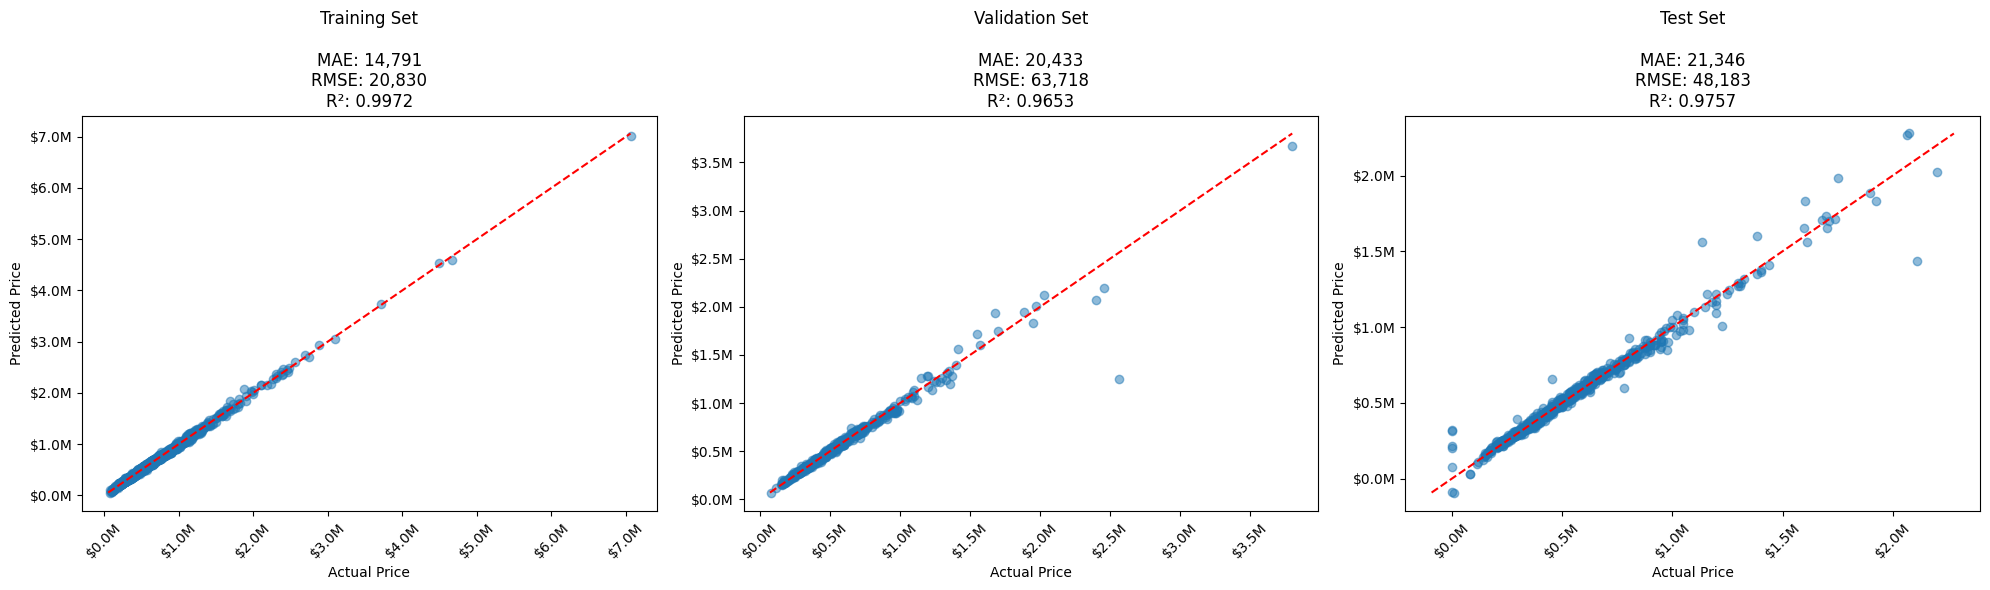

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

def plot_predictions(ax, y_true, y_pred, title, metrics):
    ax.scatter(y_true, y_pred, alpha=0.5)

    max_val = max(y_true.max(), y_pred.max())
    min_val = min(y_true.min(), y_pred.min())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

    ax.set_xlabel('Actual Price')
    ax.set_ylabel('Predicted Price')
    ax.set_title(f'{title}\nMAE: {metrics["mae"]:,.0f}\nRMSE: {metrics["rmse"]:,.0f}\nR²: {metrics["r2"]:.4f}')

    ax.xaxis.set_major_formatter(lambda x, p: f'${x/1e6:.1f}M')
    ax.yaxis.set_major_formatter(lambda x, p: f'${x/1e6:.1f}M')

    plt.setp(ax.get_xticklabels(), rotation=45)

plot_predictions(ax1, y_train, y_train_pred, 'Training Set\n',
                {'mae': mae_train, 'rmse': rmse_train, 'r2': r2_train})

plot_predictions(ax2, y_val, y_val_pred, 'Validation Set\n',
                {'mae': mae_val, 'rmse': rmse_val, 'r2': r2_val})

plot_predictions(ax3, y_test, y_test_pred, 'Test Set\n',
                {'mae': mae_test, 'rmse': rmse_test, 'r2': r2_test})

plt.tight_layout()
plt.show()

# 5. Evaluation

## 5.1. Evaluate Results

**Kesesuaian Hasil dengan Business Objectives**

Hasil dari analisis data dan model prediksi harga rumah menunjukkan bahwa tujuan bisnis yang telah ditetapkan dapat dicapai. Pertama, dengan memberikan wawasan kepada agen real estate, pemilik rumah, atau investor, analisis ini mengidentifikasi pola-pola preferensi pembeli dan mengungkapkan faktor-faktor yang paling berpengaruh terhadap harga rumah. Melalui analisis korelasi, kami menemukan bahwa House Area (`sqft_living`) memiliki korelasi yang kuat dengan House Price (0.710591), hal ini memberikan bukti bahwa ukuran rumah adalah pertimbangan utama dalam penetapan harga. Ini selaras dengan tujuan bisnis untuk membantu stakeholder dalam menetapkan harga secara strategis.

Kedua, model prediksi harga rumah menggunakan Gradient Boosting Regressor telah menunjukkan akurasi yang tinggi (pada test sets/unseen data) dengan R² mencapai 0.9757. Hal tersebut menunjukkan bahwa model mampu menjelaskan 97.57% variabilitas dalam harga rumah yang jauh melampaui target R² > 0.9. Ini berarti bahwa prediksi harga yang dihasilkan model cukup akurat dan dapat diandalkan oleh calon pembeli dalam membuat keputusan.

Ketiga, dengan adanya penetapan harga yang 90% akurat dan pengurangan margin kesalahan sebesar 10% dalam penentuan harga properti, dapat disimpulkan bahwa proyek ini berhasil dalam mencapai kriteria keberhasilan bisnis yang ditetapkan.

**Model yang Sesuai dengan Business Criteria**

Berdasarkan hasil evaluasi dan metrik kinerja model, Gradient Boosting Regressor dipilih sebagai model terbaik untuk aplikasi ini, terutama karena:
1. Akurasinya Tinggi. Metrik evaluasi menunjukkan R² 0.9639, menandakan model dapat membuat prediksi yang sangat akurat.
2. Waktu Pemrosesan. Model ini juga mencapai kriteria waktu pemrosesan yang ditetapkan, dengan waktu eksekusi 4.70 detik sehingga dapat digunakan dalam aplikasi real-time.

**Rekomendasi untuk Proyek Selanjutnya**

Berdasarkan hasil evaluasi, beberapa rekomendasi untuk proyek selanjutnya adalah sebagai berikut:
1. Pengujian dengan Dataset yang Lebih Luas. Untuk meningkatkan generalisasi model, disarankan untuk menguji model dengan dataset yang lebih besar dan beragam, termasuk faktor-faktor eksternal yang dapat mempengaruhi harga, seperti kondisi pasar dan ekonomi lokal.
2. Integrasi Data Real-Time. Implementasi sistem yang mampu memperbarui model dengan data baru secara real-time akan membantu dalam memberikan prediksi yang lebih akurat dan relevan, seiring perubahan tren pasar.
3. Analisis Lebih Dalam. Melakukan analisis lebih dalam terhadap faktor-faktor dengan korelasi rendah yang tidak berkontribusi signifikan terhadap model, untuk memahami lebih lanjut mengapa hal ini terjadi dan bagaimana hal tersebut dapat diperbaiki.


## 5.2. Review Process

Setiap tahap telah dievaluasi untuk memastikan bahwa metodologi yang digunakan konsisten, tepat sasaran, dan sesuai dengan tujuan proyek.

1. Pemahaman Bisnis dan Tujuan Data Science.

 Proses dimulai dengan memahami tujuan bisnis, dimana tujuan utama adalah memberikan wawasan kepada stakeholder untuk menetapkan harga properti secara strategis dan menawarkan prediksi harga yang akurat. Tujuan ini dengan jelas dijabarkan dan selaras dengan tujuan data science, yaitu melakukan analisis faktor-faktor yang mempengaruhi harga rumah dan membangun model prediksi yang andal.

2. Persiapan dan Pemrosesan Data.

Pada tahap ini, dilakukan peninjauan terhadap proses pengumpulan, pembersihan, dan persiapan data. Dataset yang digunakan terdiri dari 3680 baris dan 16 kolom tanpa adanya missing values, sehingga tidak ada masalah data hilang yang perlu ditangani. Langkah-langkah yang diambil dalam eksplorasi dan pemrosesan data, seperti normalisasi, analisis korelasi, dan pembuatan fitur tambahan telah diperiksa dan dipastikan sesuai dengan praktik terbaik dalam pengolahan data.

3. Pengembangan dan Pemilihan Model.

 Model Gradient Boosting Regressor yang digunakan dipilih berdasarkan performa terbaik dibandingkan model lain, seperti Random Forest dan Linear Regression. Proses pemilihan model ini ditinjau dengan menggunakan metrik evaluasi seperti R², RMSE, dan MAE untuk memastikan bahwa model yang dipilih memberikan prediksi yang paling akurat dan cepat. Proses hyperparameter tuning juga telah diperiksa untuk memastikan model bekerja secara optimal.

4. Evaluasi Hasil dan Kriteria Keberhasilan.

Hasil akhir model telah ditinjau dan dibandingkan dengan kriteria keberhasilan yang telah ditetapkan, seperti R² > 0.9, tingkat kesalahan prediksi < 10%, dan waktu pemrosesan program/eksekusi 4.70 detik dimana ketiga-tiganya mencapai target. Tinjauan ini memastikan bahwa model memenuhi atau melampaui kriteria tersebut yang berarti proyek berhasil mencapai kedua ketgia yang telah ditentukan.

## 5.3. Determine Next Steps

Berdasarkan hasil analisis dan evaluasi, langkah selanjutnya yang diusulkan adalah sebagai berikut:

1. Mengumpulkan lebih banyak data. Melakukan penambahan data terutama faktor-faktor eksternal seperti lokasi geografis, fasilitas sekitar, dan tren pasar properti. Informasi tambahan ini dapat memberikan gambaran yang lebih komprehensif tentang harga rumah, sehingga prediksi lebih mencerminkan kondisi pasar aktual.

2. Integrasi ke dalam platform real-time. Membangun aplikasi berbasis web atau mobile yang memungkinkan agen real estate, pemilik rumah, dan investor mendapatkan prediksi harga properti secara real-time. Sistem ini akan membantu para pengguna dalam menentukan harga rumah dengan cepat dan akurat, meningkatkan efisiensi dalam proses jual-beli properti.

3. Evaluasi dampak bisnis secara berkala. Mengadakan evaluasi rutin terhadap hasil prediksi dan dampaknya terhadap strategi penetapan harga yang diterapkan untuk memastikan prediksi harga terus sesuai dengan dinamika pasar dan memberi nilai tambah bagi pengguna.

# 6. Deployment

## 6.1. Plan Deployment

Untuk memastikan hasil dari analisis data science dapat diintegrasikan secara efektif ke dalam proses bisnis, berikut adalah rencana penerapannya:

1. Integrasi dengan sistem penentuan harga. Prediksi harga rumah yang dihasilkan dari model regresi akan diintegrasikan ke dalam sistem penentuan harga real-time yang digunakan oleh agen real estate dan investor.

Langkah: Membuat API yang menghubungkan model prediksi harga ke platform yang digunakan oleh bisnis, memungkinkan pengguna untuk mengakses prediksi langsung melalui sistem mereka.

2. Pelatihan pengguna. Menyediakan pelatihan bagi agen real estate dan staf lainnya tentang cara menggunakan hasil prediksi dalam proses penetapan harga properti.

Langkah: Menyiapkan sesi pelatihan atau tutorial untuk memastikan pengguna memahami cara menginterpretasi hasil prediksi dan menerapkannya dalam keputusan bisnis sehari-hari.

3. Pemantauan dan pemeliharaan sistem. Setelah implementasi, akan dilakukan pemantauan performa model secara berkala untuk memastikan prediksi tetap akurat dan relevan.

Langkah: Menetapkan jadwal pemeliharaan rutin dan membuat sistem feedback yang memungkinkan pengguna melaporkan masalah atau mengajukan pembaruan data jika diperlukan.

4. Pengembangan dashboard interaktif. Menyediakan dashboard interaktif untuk menampilkan prediksi harga rumah berdasarkan input variabel yang diinginkan oleh pengguna (seperti ukuran rumah, jumlah kamar, dll.).

Langkah: Merancang dashboard yang intuitif untuk memudahkan agen atau investor untuk melihat prediksi secara visual dan melakukan perbandingan langsung di dalam platform.


In [ ]:
with open('best_gb_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
with open('best_gb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

## 6.2. Plan Monitoring and Maintenance

1. Pemantauan Kinerja Model Secara Berkala

Mengukur performa model secara rutin menggunakan metrik evaluasi seperti R² dan tingkat kesalahan prediksi. Hal ini penting untuk memastikan prediksi tetap akurat seiring dengan perubahan data yang masuk.

Model dapat kehilangan akurasi jika data yang digunakan berubah secara signifikan.Pemantauan membantu mendeteksi kapan model perlu diperbarui.

2. Pengumpulan Data Baru dan Pembaruan Model

Mengumpulkan data properti terbaru secara berkala dan jika diperlukan, melatih ulang model dengan data yang lebih mutakhir.

Data yang lebih baru akan mencerminkan kondisi pasar saat ini dan memastikan prediksi tetap relevan dengan tren harga terbaru.

3. Sistem Feedback dari Pengguna

Membuat mekanisme bagi pengguna (seperti agen real estate) untuk memberikan feedback terhadap hasil prediksi atau jika mereka melihat anomali.

Umpan balik dari pengguna di lapangan dapat membantu mengidentifikasi masalah yang mungkin terlewat dalam pemantauan otomatis, serta memberikan wawasan tentang peningkatan yang diperlukan.

4. Perawatan Sistem dan Infrastruktur

Menetapkan jadwal perawatan rutin untuk memastikan infrastruktur yang mendukung model prediksi tetap berfungsi optimal, termasuk perawatan server, pembaruan software, dan pemeriksaan integrasi API.

Stabilitas infrastruktur sangat penting untuk memastikan sistem dapat menangani permintaan prediksi secara konsisten dan tanpa gangguan.

5. Pemantauan Keselarasan dengan Tujuan Bisnis

Secara berkala, tinjau apakah model prediksi masih mendukung pencapaian tujuan bisnis utama, seperti akurasi harga 90% dan penurunan margin kesalahan 10%.

Seiring waktu, tujuan bisnis dapat berubah atau berkembang, dan model harus terus disesuaikan agar tetap relevan dan memberikan nilai bisnis yang optimal.
